# Title : Titanic Dataset
### Author: Vaishnav Krishna P
## Intership : CodSoft
### Dataset Source : https://www.kaggle.com/datasets/yasserh/titanic-dataset
### Task:
* Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
* The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [1]:
# Importing necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries to ignore the incompactable warnings
import warnings
warnings.filterwarnings(action = "ignore")

In [3]:
# Importing dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
# First five records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### EDA(Explorative data Analysis)
steps:
* Missing value analysis
* Separating Discrete and Continous values
* Corelation Analysis
* Outlier Analysis
* Data Visualisation

### Missing value

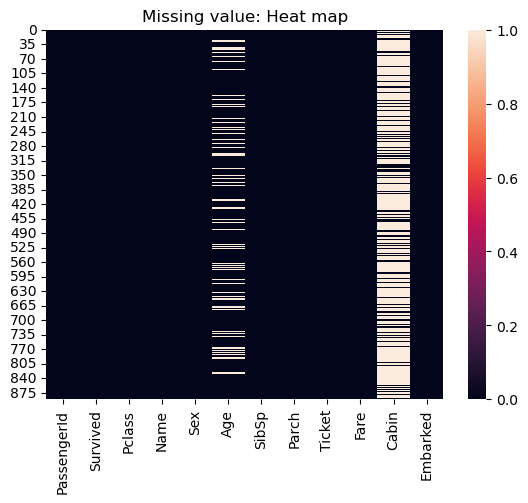

In [7]:
# Missing value using heatmap in seaborn library
sns.heatmap(df.isnull())
plt.title("Missing value: Heat map")
plt.show()

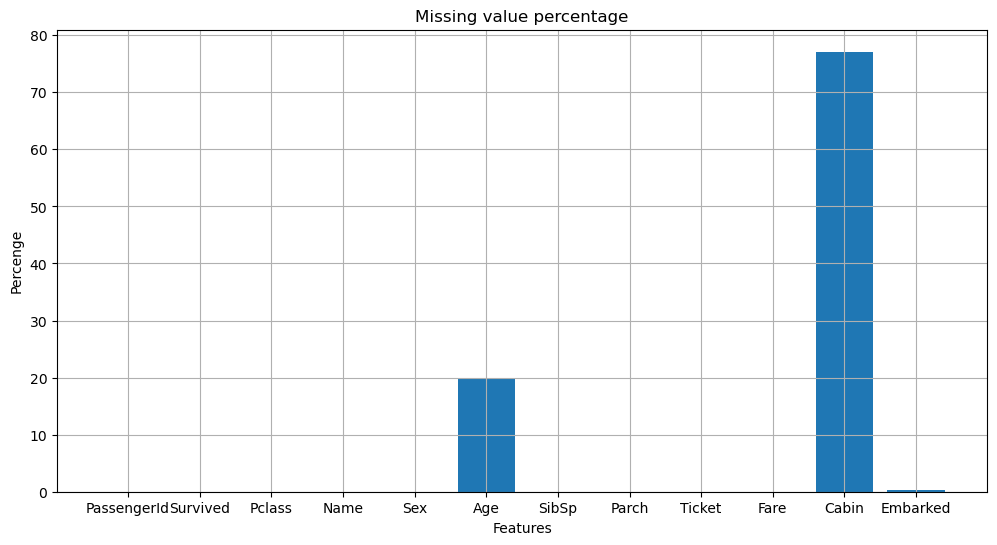

In [8]:
# Lets, Understand how many percentage of missing values in each features
plt.figure(figsize=(12,6))
plt.title("Missing value percentage")
plt.bar(df.columns,100 * df.isnull().sum()/len(df))
plt.ylabel("Percenge")
plt.xlabel("Features")
plt.grid(True)
plt.show()

From the above heatmap and bar plot. we understood one thing that features named Age,Cabin,Embarked have Misssing values.
* The feature named Cabin: more than 75% percentage is missing values.
* The feature named Age: Have 20% missing values.
We can do missing value handling in later part

In [9]:
# We know that name and passengerId is a constant feature and does not contribute much in this DataScience Analysis.So, Now its time to under stand the features types.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Dataset Details:
Now lets undertand about the features.
1. PassengerId - PassengerId is a unique id for each passenger travelling.
2. Survived(target feature) - This features contains the informations about whether the pasenger has survived or not.(0-no,1-yes)
3. pclass -  This features tell us about the passenger class.on which class they are travelling.(1-1st,2-2nd,3-3rd)
4. Name -  Name of the passenger.
5. Sex -  This feature tells about the sex of the passenger.Whether the passenger is male or female.
6. Age - Age of the pasenger.
7. SibSp - This feature tells the information about the No of Siblings or No of spouse.
8. Parch - No of parents or childrens.
9. Ticket - ticket number.
10. Fare - Fare of the ticket.
11. Cabin - Cabin number.
12. Embarked - Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

### Dataset is balanced

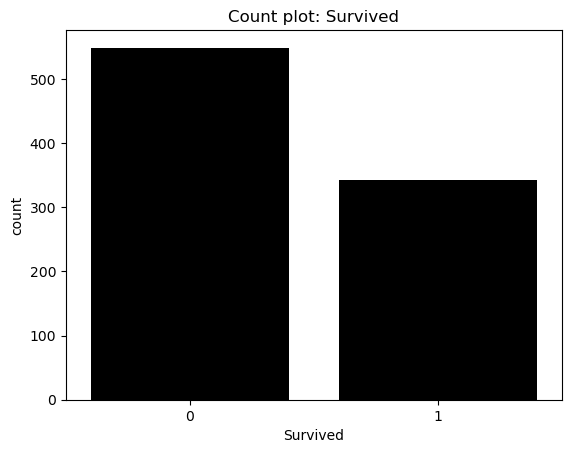

In [10]:
# Now lets. check whether the data set is balanced or not
plt.title("Count plot: Survived")
sns.countplot(x = "Survived",data = df,color="k")
plt.show()

In [11]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the above count plot,It is understandable that the target feature is not very much imbalanced.
- the datset consists of 549 passenegers who is not survied and 342 people who got survived.
* As per this dataset,it is understandable that majority of the passengers travelling in the ship has been not survived.

In [12]:
# Now, we are dividing the datset into the records of the people who got survived and who doesnot.
survived_df = df[df["Survived"] == 1]
notSurvived_df = df[df["Survived"] == 0]

### Passenger class

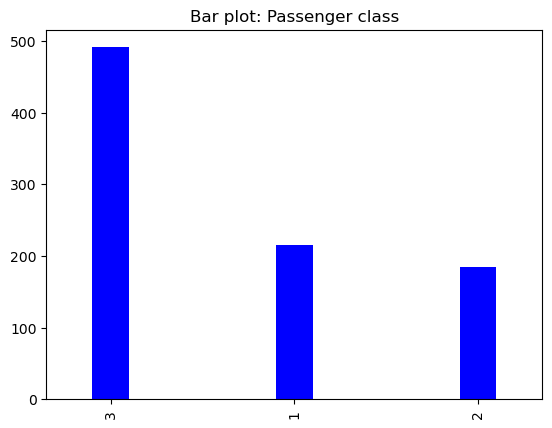

In [13]:
# Passenger class bar plot of the entire dataframe
plt.title("Bar plot: Passenger class")
df["Pclass"].value_counts().plot(kind="bar",color="b",width=0.2)
plt.show()

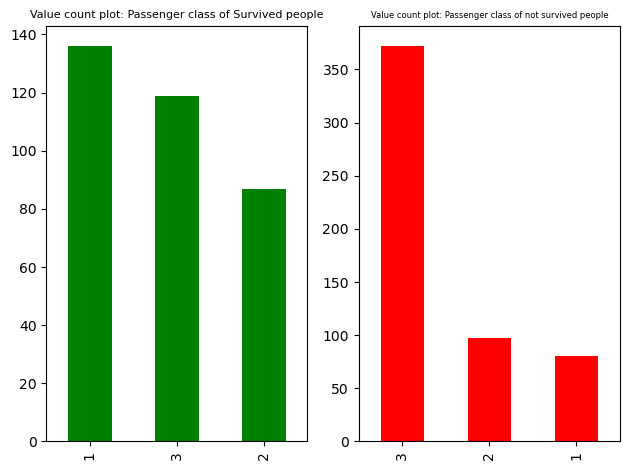

In [14]:
# We can diffierentaite the difference between the passesnger class distribution of the psople get survved anf not
plt.subplot(1,2,1)
plt.title("Value count plot: Passenger class of Survived people",size=8)
survived_df["Pclass"].value_counts().plot(kind="bar",color="g")
plt.subplot(1,2,2)
plt.title("Value count plot: Passenger class of not survived people",size=6)
notSurvived_df["Pclass"].value_counts().plot(kind="bar",color="r")
plt.tight_layout()
plt.show()

* from this visualisation.It is understandable that passenger travelling in the 3rd class. have high chance of getting not survived. and passenger in 1st class have the high chhance of getting Survived.
* from this, we can conclude that they officers in the titanic have give more importance to the people who is travelling in the first class.

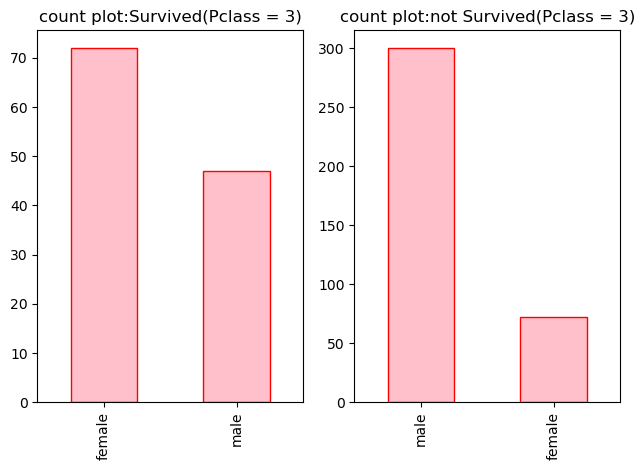

In [15]:
# Almost 120 passenger in the class 3 got survied, lets analyse what behavoural people have got survived
plt.subplot(1,2,1)
plt.title("count plot:Survived(Pclass = 3)")
survived_df[df["Pclass"] == 3]["Sex"].value_counts().plot(kind="bar",color="pink",edgecolor="r")
plt.subplot(1,2,2)
plt.title("count plot:not Survived(Pclass = 3)")
notSurvived_df[df["Pclass"] == 3]["Sex"].value_counts().plot(kind="bar",color="pink",edgecolor="r")
plt.tight_layout()
plt.show()

* male passengers in the class 3 has high chance of getting unSurvived.Almost 50% of the female travellers in class 3 get Survived.
* So from the Data Analysis we understood that almost chance of survival for each class.(rough not exact)
1. 1st class - 75%
2. 2nd class - 45%
3. 3rd class - 25%

### Ticket fare

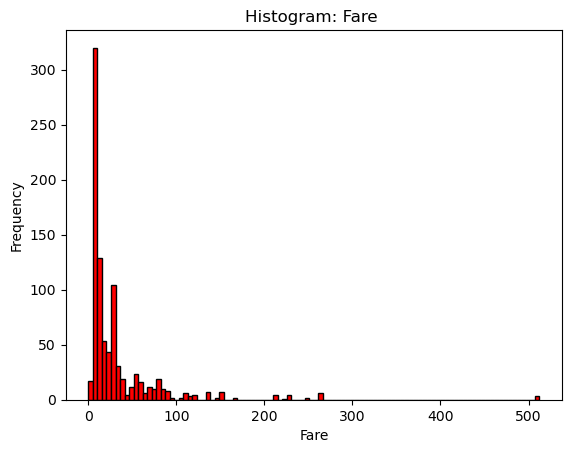

In [16]:
# Now lets understand the distribution of the Fare
# Since, in this dataset majority of the passengers are 3rd class.So most probably the distribution must be skewed
df["Fare"].plot(kind="hist",bins=100,color="r",edgecolor="k",title="Histogram: Fare ")
plt.xlabel("Fare")
plt.show()

In [17]:
# So, as expected the distribution is very much skewed.lets understand the intensity of the skewness by measuring it.
# Skewness = 3(Mean - Median)/standerd deviation
mean_fare = np.mean(df["Fare"])
median_fare = np.median(df["Fare"])
std_fare = np.std(df["Fare"])
sk_fare = (3 * (mean_fare - median_fare))/std_fare
# Skewness of the fare
sk_fare

1.0721725740198262

* So, the skewness of the fare is 1.07 which is very high positive value.fare is positive skewed

In [18]:
df["Pclass"].corr(df["Fare"])

-0.5494996199439074

[]

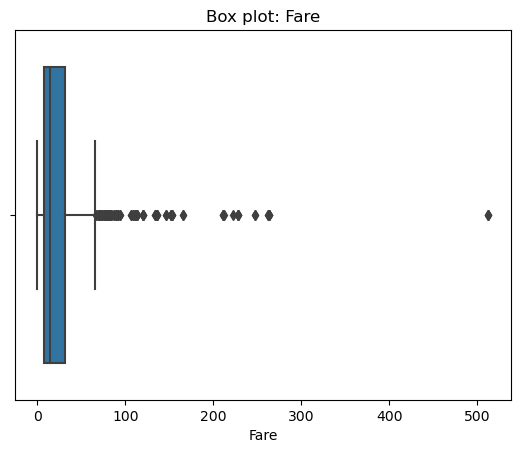

In [19]:
plt.title("Box plot: Fare")
sns.boxplot(x="Fare",data = df)
plt.plot()

* Fare feature have so much of outliers since 75% of the data points lies below 50.So have to apply some power full transformation functions.

### Sex

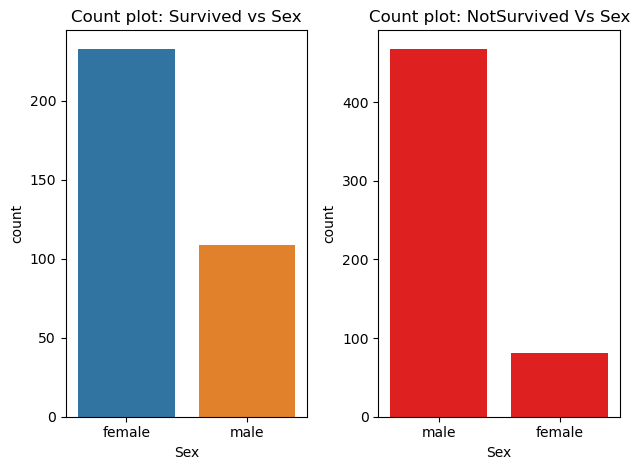

In [20]:
# Now we can understand the sex feature.and How it is related to the target feature
plt.subplot(1,2,1)
plt.title("Count plot: Survived vs Sex")
sns.countplot(x = "Sex",data = survived_df)
plt.subplot(1,2,2)
plt.title("Count plot: NotSurvived Vs Sex")
sns.countplot(x = "Sex",data = notSurvived_df,color="r")
plt.tight_layout()
plt.show()

* From the count plot above, it is very clear that.Among the survived people 71%+ follows females.
* Among the not survived people more than 70% people are male catrgory.
* So, the dataset concludes, if the passenger is a female gender.then there is a high chance of getting survived.

### Age

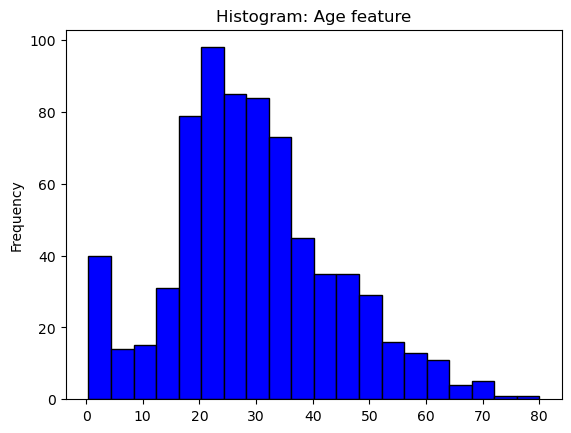

In [21]:
# Age feature distrubution
plt.title("Histogram: Age feature")
df["Age"].plot(kind="hist",bins=20,color="b",edgecolor="k")
plt.show()

* From the above histogram, we understand that majority of the passengers belongs to the category of 18-40 age.

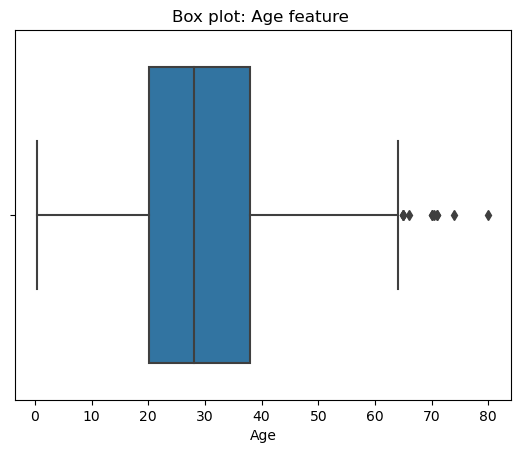

In [41]:
# Lets make a boxplot of the age feature 
plt.title("Box plot: Age feature ")
sns.boxplot(x="Age",data = df)
plt.show()

* So, the Age feature shows that 75% of the passengers have the age less than 40.age greater than 60+ is treated as a outliers 

### SibSp and Parch

In [22]:
df["SibSp"].corr(df["Survived"])

-0.035322498885735645

In [23]:
df["Parch"].corr(df["Survived"])

0.08162940708348372

* Features such as SibSp(No of Siblings or Spouse) and Parch(Parents or childrens) have relatively less corelation with the target feature.
* Lets understand its destribution

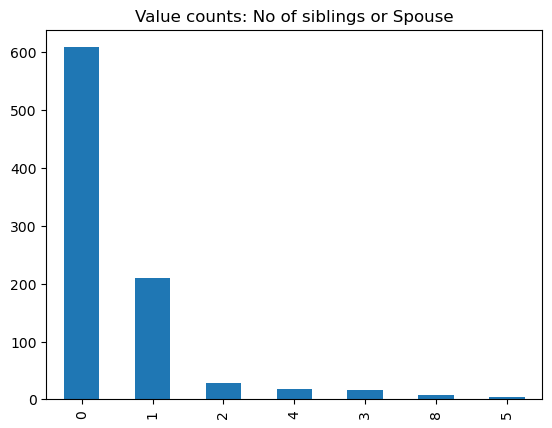

In [24]:
plt.title("Value counts: No of siblings or Spouse")
df["SibSp"].value_counts().plot(kind="bar")
plt.show()

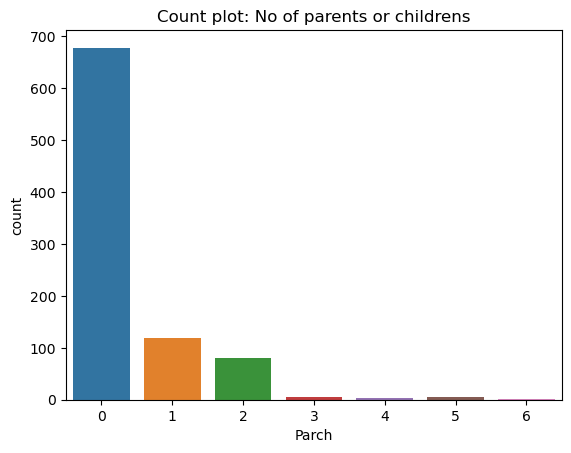

In [25]:
plt.title("Count plot: No of parents or childrens")
sns.countplot(x="Parch",data = df)
plt.show()

* From the above two bar plots.It is understandable that majority of the passengers are travelling with out their parents or childres or siblings or spouse.

### Embarked

In [26]:
# Now we can move to the feature called Embarked
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

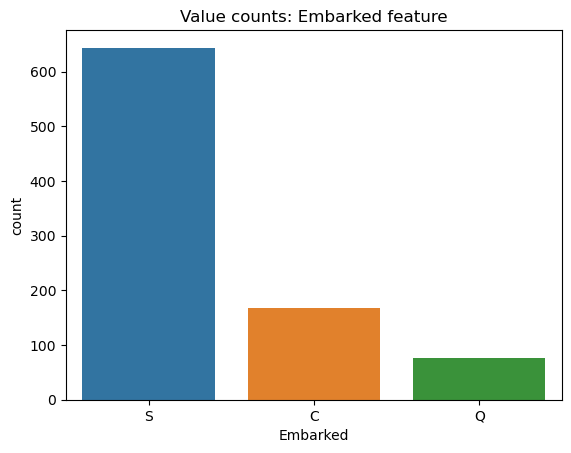

In [27]:
plt.title("Value counts: Embarked feature")
sns.countplot(x="Embarked",data = df)
plt.show()

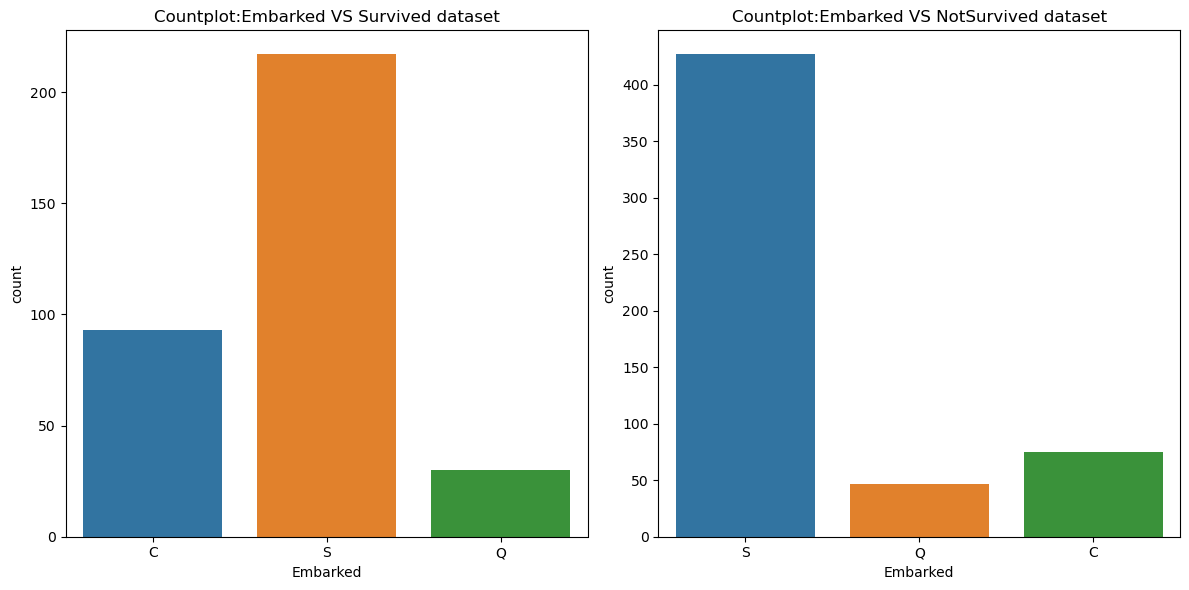

In [37]:
# We can use visualisation tools to understand how this feature is related to the target feature
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Countplot:Embarked VS Survived dataset")
sns.countplot(x= "Embarked",data = survived_df)
plt.subplot(1,2,2)
plt.title("Countplot:Embarked VS NotSurvived dataset")
sns.countplot(x= "Embarked",data = notSurvived_df)
plt.tight_layout()
plt.show()

In [29]:
# Corelation with the target feature
df["Embarked"].map({"C":3,"S":2,"Q":1}).corr(df["Survived"])

0.12675346550352665

In [30]:
survived_df["Embarked"].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [31]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
# Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
print("Percentage of getting Survived (Embarked)")
print("Survival chance of person from Southampton(S): ",100*(217/644))
print("Survival chance of person from Cherbourg(C): ", 100*(93/168))
print("Survival chance of person from Queenstown(Q): ", 100 * (30/77))

Percentage of getting Survived (Embarked)
Survival chance of person from Southampton(S):  33.69565217391305
Survival chance of person from Cherbourg(C):  55.35714285714286
Survival chance of person from Queenstown(Q):  38.961038961038966


* From the Analysis, we understood one thing.The person embarked from Cheranbourge have a high chance of getting Survived than others(55%).

In [33]:
# Cabin feature has a high missing value so,we can remove this later on.
df.Cabin.isnull().sum()

687

In [40]:
# EDA ENDS